# Oppenheimer-Snyder collapse

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

The computations make use of tools developed through the [SageManifolds project](https://sagemanifolds.obspm.fr).

In [1]:
version()

'SageMath version 9.5.beta6, Release Date: 2021-11-12'

In [2]:
%display latex

In [3]:
eta = var('eta', latex_name=r'\eta')

In [4]:
rr(eta) = (1 + cos(eta))/2
rr

eta |--> 1/2*cos(eta) + 1/2

In [5]:
tau(eta) = (eta + sin(eta))/2
tau

eta |--> 1/2*eta + 1/2*sin(eta)

In [6]:
rho(eta) = 1 / (1 + cos(eta))^3
rho

eta |--> (cos(eta) + 1)^(-3)

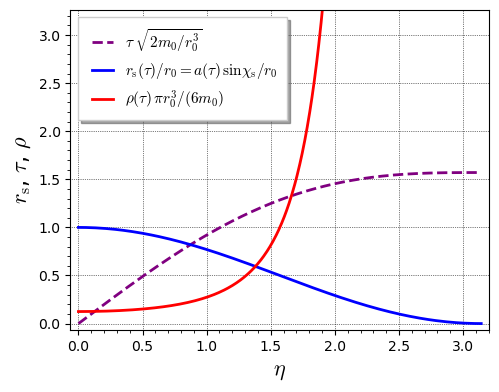

In [7]:
graph = plot(tau, (0, pi), color='purple', thickness=2, linestyle='--',
             legend_label=r'$\tau \;  \sqrt{2 m_0 / r_0^3}$',
             axes_labels=[r'$\eta$', r'$r_{\rm s}$, $\tau$, $\rho$'],
             frame=True, axes=False, gridlines=True) \
        + plot(rr, (0, pi), color='blue', thickness=2, 
               legend_label=r'$r_{\rm s}(\tau)/r_0 = a(\tau)\, \sin\chi_{\rm s} / r_0$') \
        + plot(rho, (0, 2), color='red', thickness=2, 
               legend_label=r'$\rho(\tau) \, \pi r_0^3/(6 m_0)$')
graph.set_legend_options(handlelength=2, labelspacing=0.5,
                         font_size=11)
graph.set_aspect_ratio(0.75)
show(graph, ymax=3.2)
graph.save('lem_OS_rs_rho_eta.pdf', ymax=3.2)

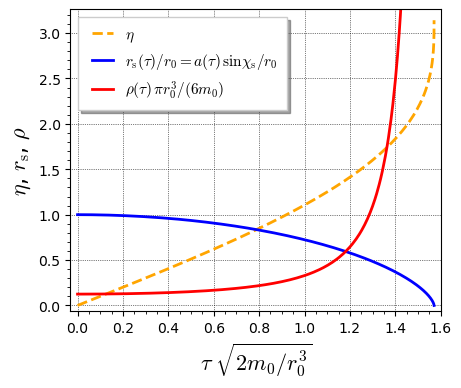

In [8]:
graph = parametric_plot((tau(eta), eta), (eta, 0, pi), color='orange', 
                        linestyle='--', thickness=2, 
                        legend_label=r'$\eta$',
                        axes_labels=[r'$\tau \; \sqrt{2m_0/r_0^3}$', 
                                     r'$\eta$, $r_{\rm s}$, $\rho$'], 
                        frame=True, axes=False, gridlines=True) \
        + parametric_plot((tau(eta), rr(eta)), (eta, 0, pi), color='blue',
                          thickness=2, 
                          legend_label=r'$r_{\rm s}(\tau)/r_0 = a(\tau)\, \sin\chi_{\rm s} / r_0$') \
        + parametric_plot((tau(eta), rho(eta)), (eta, 0, 2), color='red', 
                          thickness=2, 
                          legend_label=r'$\rho(\tau) \, \pi r_0^3/(6 m_0)$')
graph.set_legend_options(handlelength=2, labelspacing=0.5,
                         font_size=11)
graph.set_aspect_ratio(0.4)
show(graph, ymax=3.2)
graph.save('lem_OS_rs_rho_tau.pdf', ymax=3.2)